In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'G:\Project\Meterology/weatherHistory.csv',error_bad_lines=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_8664\1377693276.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'G:\Project\Meterology/weatherHistory.csv',error_bad_lines=False)


In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
missing_value_count= df.isnull().sum() #to get the number of missing value
missing_value_count

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
total_cells = np.product(df.shape) #how many total missing values do we have
total_missing = missing_value_count.sum()
#percent of data that is missing
percent_missing = (total_missing/total_cells)* 100
percent_missing

0.04872839621369994

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [7]:
titles_req=['Formatted Date','Apparent Temperature (C)','Humidity','Summary']
df1=df[titles_req]
df1

,Formatted Date,Apparent Temperature (C),Humidity,Summary
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,Partly Cloudy
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,Partly Cloudy
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,Mostly Cloudy
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,Partly Cloudy
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,Mostly Cloudy
...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667,0.43,Partly Cloudy
96449,2016-09-09 20:00:00.000 +0200,24.583333,0.48,Partly Cloudy
96450,2016-09-09 21:00:00.000 +0200,22.038889,0.56,Partly Cloudy
96451,2016-09-09 22:00:00.000 +0200,21.522222,0.60,Partly Cloudy


In [8]:
df1.rename({'Apparent Temperature (C)': 'Apparent Temperature'},axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8664\4007272432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename({'Apparent Temperature (C)': 'Apparent Temperature'},axis=1, inplace=True)


In [9]:
df1['Formatted Date']=pd.to_datetime(df1['Formatted Date'],utc=True)
df2=df1.set_index('Formatted Date')



C:\Users\USER\AppData\Local\Temp\ipykernel_8664\3034907665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Formatted Date']=pd.to_datetime(df1['Formatted Date'],utc=True)


In [10]:
df3=df2[['Apparent Temperature','Humidity']].resample('MS').mean()
df3

,Apparent Temperature,Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


Text(0.5, 1.0, 'Relation of Apparent Temperature and Humidity')

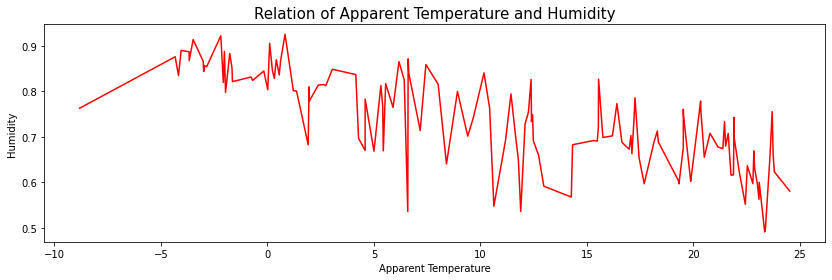

In [11]:
plt.figure(figsize=(14,4))
sns.lineplot(x="Apparent Temperature",y="Humidity",data=df3 ,color='red', linestyle='solid')
plt.title("Relation of Apparent Temperature and Humidity",fontsize=15 )

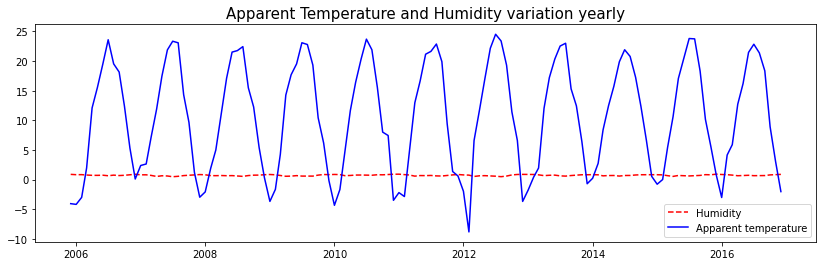

In [12]:
plt.figure(figsize= (14,4))
plt.plot(df3['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(df3['Apparent Temperature'], label = 'Apparent temperature', color= 'blue')
plt.title('Apparent Temperature and Humidity variation yearly', fontsize=15)
plt.legend(loc= 0)

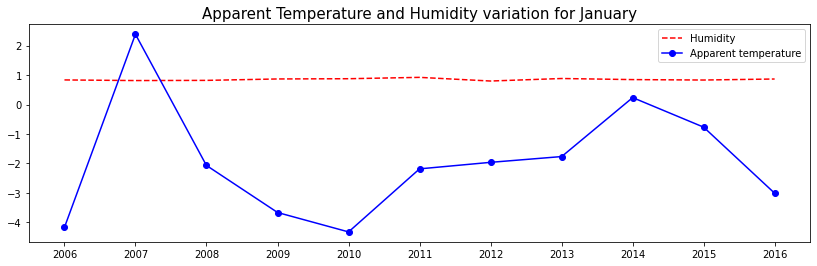

In [13]:
jan=df3[df3.index.month ==1]
plt.figure(figsize= (14,4))
plt.plot(jan['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(jan['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for January', fontsize=15)
plt.legend(loc= 0)

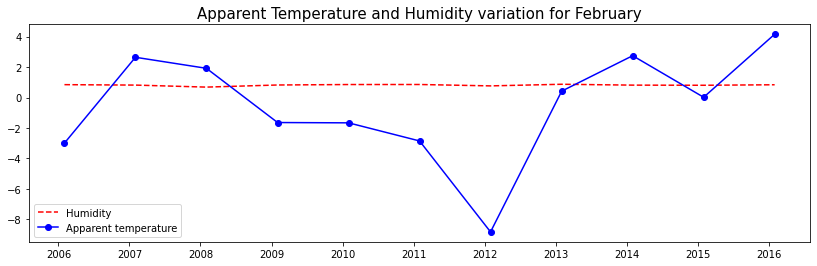

In [14]:
feb=df3[df3.index.month ==2]
plt.figure(figsize= (14,4))
plt.plot(feb['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(feb['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for February', fontsize=15)
plt.legend(loc= 0)

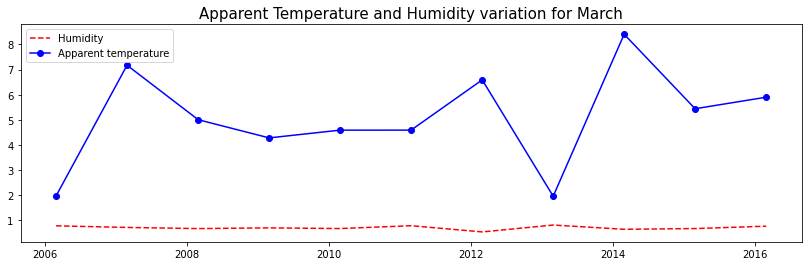

In [15]:
mar=df3[df3.index.month ==3]
plt.figure(figsize= (14,4))
plt.plot(mar['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(mar['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for March', fontsize=15)
plt.legend(loc= 0)

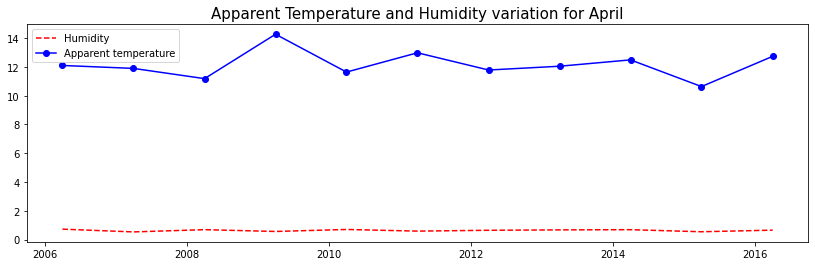

In [16]:
apr=df3[df3.index.month ==4]
plt.figure(figsize= (14,4))
plt.plot(apr['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(apr['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for April', fontsize=15)
plt.legend(loc= 0)

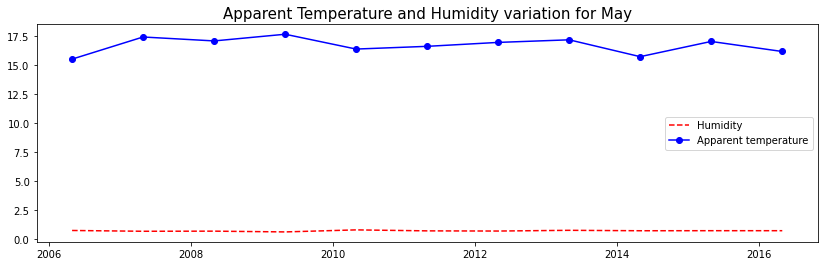

In [17]:
may=df3[df3.index.month ==5]
plt.figure(figsize= (14,4))
plt.plot(may['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(may['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for May', fontsize=15)
plt.legend(loc= 0)

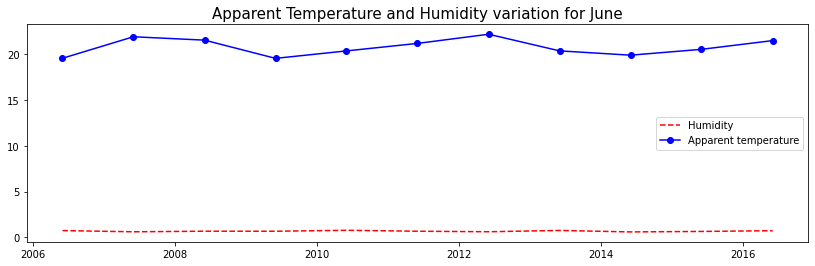

In [18]:
june=df3[df3.index.month ==6]
plt.figure(figsize= (14,4))
plt.plot(june['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(june['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for June', fontsize=15)
plt.legend(loc= 0)

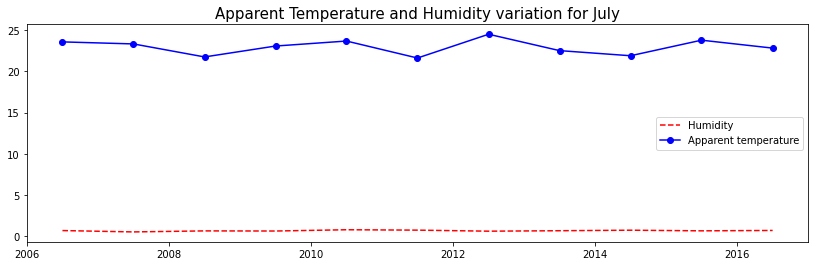

In [19]:
july=df3[df3.index.month ==7]
plt.figure(figsize= (14,4))
plt.plot(july['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(july['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for July', fontsize=15)
plt.legend(loc= 0)

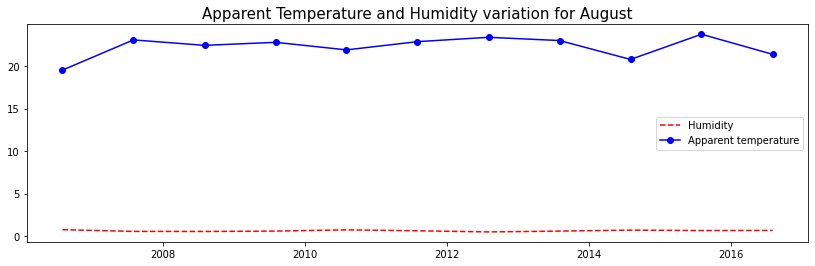

In [20]:
aug=df3[df3.index.month ==8]
plt.figure(figsize= (14,4))
plt.plot(aug['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(aug['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for August', fontsize=15)
plt.legend(loc= 0)

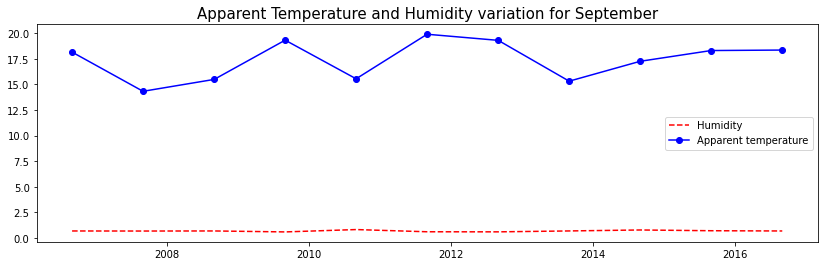

In [21]:
sept=df3[df3.index.month ==9]
plt.figure(figsize= (14,4))
plt.plot(sept['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(sept['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for September', fontsize=15)
plt.legend(loc= 0)

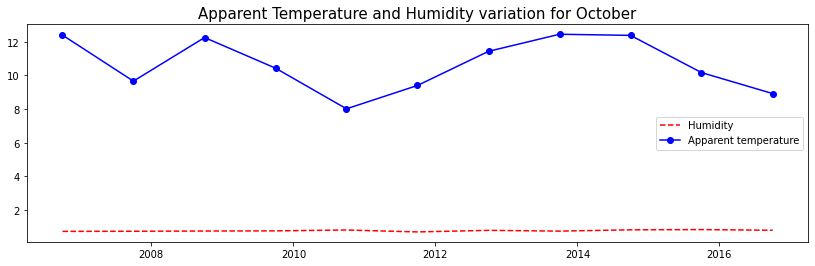

In [22]:
octb=df3[df3.index.month ==10]
plt.figure(figsize= (14,4))
plt.plot(octb['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(octb['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apparent Temperature and Humidity variation for October', fontsize=15)
plt.legend(loc= 0)

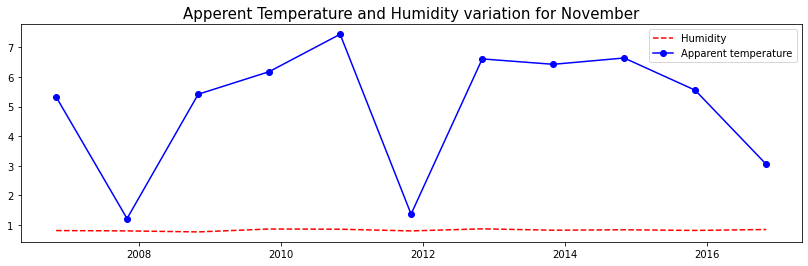

In [23]:
nov=df3[df3.index.month ==11]
plt.figure(figsize= (14,4))
plt.plot(nov['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(nov['Apparent Temperature'], label = 'Apparent temperature', color= 'blue',marker="o")
plt.title('Apperent Temperature and Humidity variation for November', fontsize=15)
plt.legend(loc= 0)

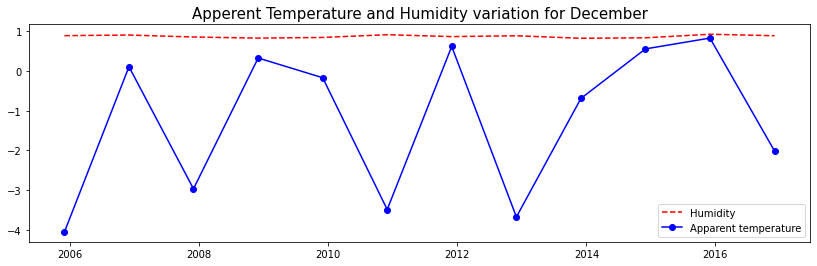

In [24]:
dec=df3[df3.index.month ==12]
plt.figure(figsize= (14,4))
plt.plot(dec['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(dec['Apparent Temperature'], label = 'Apparent temperature', color= 'blue', marker='o')
plt.title('Apperent Temperature and Humidity variation for December', fontsize=15)
plt.legend(loc= 0)

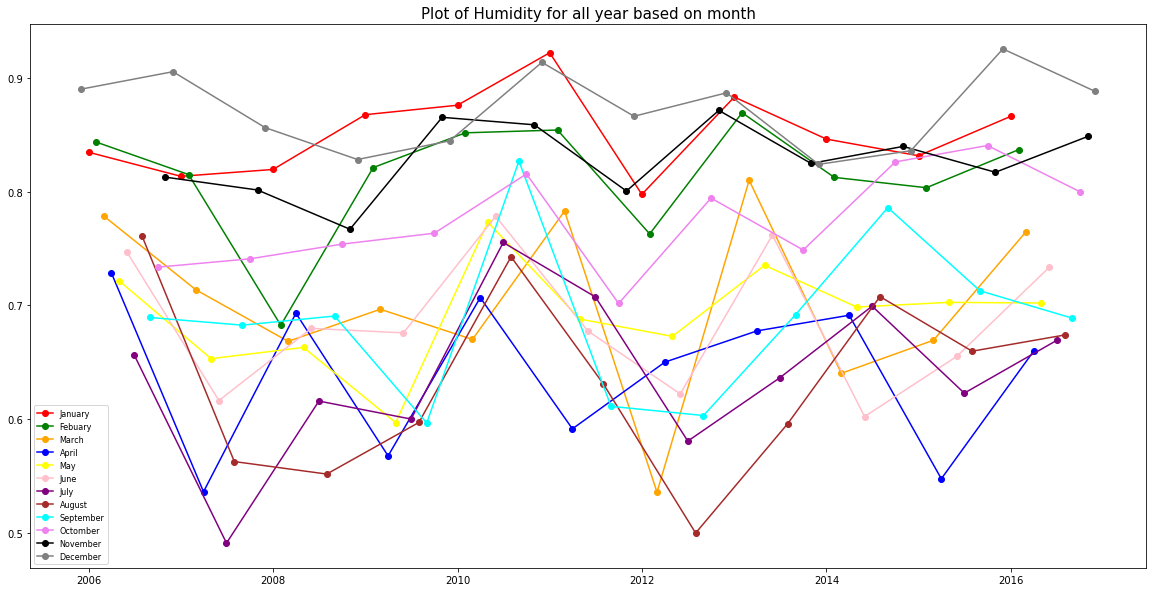

In [25]:


plt.figure(figsize=(20,10))
plt.title("Plot of Humidity for all year based on month", fontsize=15)
plt.plot(jan['Humidity'],label='January',color='red',marker='o')
plt.plot(feb['Humidity'],label='Febuary',color='green',marker='o')
plt.plot(mar['Humidity'],label='March',color='orange',marker='o')
plt.plot(apr['Humidity'],label='April',color='blue',marker='o')
plt.plot(may['Humidity'],label='May',color='yellow',marker='o')
plt.plot(june['Humidity'],label='June',color='pink',marker='o')
plt.plot(july['Humidity'],label='July',color='purple',marker='o')
plt.plot(aug['Humidity'],label='August',color='brown',marker='o')
plt.plot(sept['Humidity'],label='September',color='cyan',marker='o')
plt.plot(octb['Humidity'],label='Octomber',color='violet',marker='o')
plt.plot(nov['Humidity'],label='November',color='black',marker='o')
plt.plot(dec['Humidity'],label='December',color='grey',marker='o')



plt.legend(loc=0,fontsize=8)



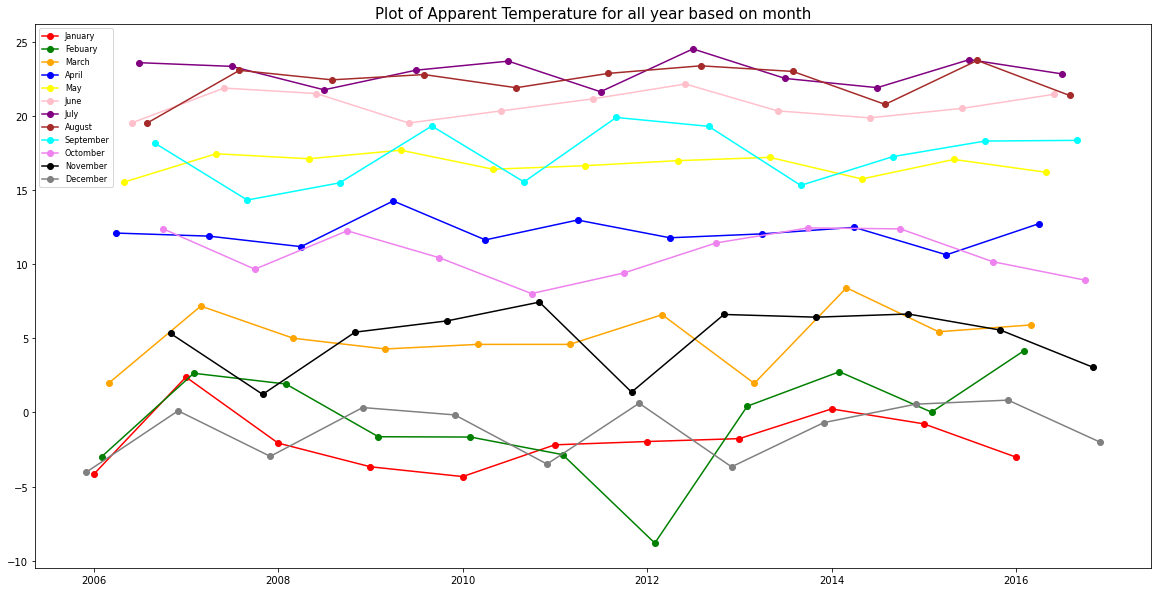

In [26]:


plt.figure(figsize=(20,10))
plt.title("Plot of Apparent Temperature for all year based on month", fontsize=15)
plt.plot(jan['Apparent Temperature'],label='January',color='red',marker='o')
plt.plot(feb['Apparent Temperature'],label='Febuary',color='green',marker='o')
plt.plot(mar['Apparent Temperature'],label='March',color='orange',marker='o')
plt.plot(apr['Apparent Temperature'],label='April',color='blue',marker='o')
plt.plot(may['Apparent Temperature'],label='May',color='yellow',marker='o')
plt.plot(june['Apparent Temperature'],label='June',color='pink',marker='o')
plt.plot(july['Apparent Temperature'],label='July',color='purple',marker='o')
plt.plot(aug['Apparent Temperature'],label='August',color='brown',marker='o')
plt.plot(sept['Apparent Temperature'],label='September',color='cyan',marker='o')
plt.plot(octb['Apparent Temperature'],label='Octomber',color='violet',marker='o')
plt.plot(nov['Apparent Temperature'],label='November',color='black',marker='o')
plt.plot(dec['Apparent Temperature'],label='December',color='grey',marker='o')

plt.legend(loc=0,fontsize=8)